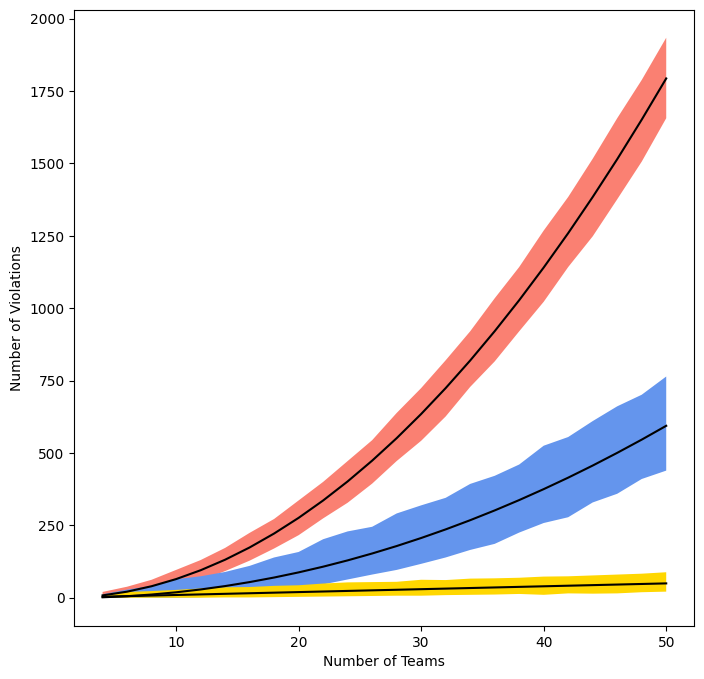

        2
0.7358 x - 0.9197 x - 0.04622
      2
0.25 x - 0.6264 x + 0.008373
 
1.002 x - 0.5831


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import re

drrvPattern = re.compile(r"Double Round Robin Violations average: (.+), minimum: (.+), maximum: (.+)")
msvPattern  = re.compile(r"Maximum Streak Violations average: (.+), minimum: (.+), maximum: (.+)")
nrvPattern  = re.compile(r"No Repeat Violations average: (.+), minimum: (.+), maximum: (.+)")

x = [i for i in range(4,52,2)]

alldrrv = []
mindrrv = []
maxdrrv = []

allmsv = []
minmsv = []
maxmsv = []

allnrv = []
minnrv = []
maxnrv = []

for file in [f"20241018-20:58-{i}teams-1000000reps.txt" for i in x]:
    with open(file) as f:
        lines = f.readlines()
        
        drrv    = tuple(map(float, re.findall(drrvPattern, lines[0])[0]))
        msv     = tuple(map(float, re.findall(msvPattern,  lines[1])[0]))
        nrv     = tuple(map(float, re.findall(nrvPattern,  lines[2])[0]))
        
        alldrrv.append(drrv[0])
        mindrrv.append(drrv[1])
        maxdrrv.append(drrv[2])
        
        allmsv.append(msv[0])
        minmsv.append(msv[1])
        maxmsv.append(msv[2])
        
        allnrv.append(nrv[0])
        minnrv.append(nrv[1])
        maxnrv.append(nrv[2])

fig, ax = plt.subplots(figsize=(8, 8))

# Plotting code
ax.fill_between(x, mindrrv, maxdrrv, facecolor='salmon')  # 95% CI
ax.plot(x, alldrrv, '-', label="All DRRV", color='black')  # All DRRV

ax.fill_between(x, minmsv, maxmsv, facecolor='cornflowerblue')  # 95% CI
ax.plot(x, allmsv, '-', label="All MSV", color='black')  # All MSV

ax.fill_between(x, minnrv, maxnrv, facecolor='gold')  # 95% CI
ax.plot(x, allnrv, '-', label="All NRV", color='black')  # All NRV

ax.set_xlabel("Number of Teams")
ax.set_ylabel("Number of Violations")

plt.show()

fit = np.polyfit(x,alldrrv,2)
fit_fn = np.poly1d(fit)
print(fit_fn)

fit = np.polyfit(x,allmsv,2)
fit_fn = np.poly1d(fit) 
print(fit_fn)

fit = np.polyfit(x,allnrv,1)
fit_fn  = np.poly1d(fit) 
print(fit_fn)